# The Stags - Health Stats Part 5

###### Data Source : 2015 US Department of Labour 

##### Research Questions to be answered
1. Is there a significant effect on drinking beverages other than water on BMI?
2. Is there a significant difference in BMI between diet soda consumers and regular soda consumers?
3. Is there a significant difference in the BMI of diet soda consumers versus global consumers minus diet soda, and regular soda consumers versus global consumers minus regular soda? 
4. Is there a significant effect on BMI for people who excercise vs people who dont?
5. Is there a significant effect on BMI for people with excellent health condition vs others
7. Is there a correlation between high BMI and Households whose income is high?


###### Key columns in Dataset

1. Body Mass Index (BMI)
2. Diet, Regular, or Both Soda (EUDIETSODA)
3. Cola Beverages (EUSODA)
4. Household Income (EEINCOME1)
6. Excercise (EUEXCERCISE)
7. Health condition (EUGENHTH)

In [1]:
# Package install
%matplotlib inline 
# Import modules!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data import/loading!
source_data = pd.read_csv('ehresp_2015.csv')

###### Step 1 Import csv and create DataFrame

In [2]:
#Create new DataFrame "Results" and add the key columns to dataset
results = pd.DataFrame(source_data['ERBMI'])
results['EUHGT'] = source_data['EUHGT'] 
results['EUWGT'] = source_data['EUWGT']
results['EUDIETSODA'] = source_data['EUDIETSODA']
results['EUSODA'] = source_data['EUSODA']
results['EEINCOME1'] = source_data['EEINCOME1']  
results['EUEXERCISE'] = source_data['EUEXERCISE']
results['EUGENHTH'] = source_data['EUGENHTH']
#print(results.describe())

###### Step 2: Clean the Data

We used a boolean to retain rows where the weight, height, and BMI were positive.
All rows that failed this check were rejected.
From the initial count of 10,626 we have culled the data to 10,071 rows

In [3]:
results_clean = (results[(results.EUWGT > 0) & (results.EUHGT > 0) & (results.ERBMI > 0)])
results = results_clean
#print(results.describe())

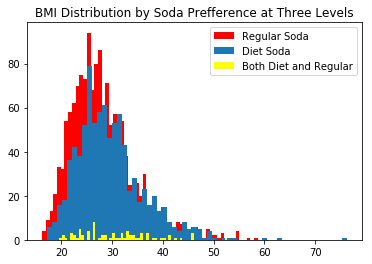

,Average,Count,Max,Min,Std
Both Regular and Diet Soda,30.79,72,52.7,19.5,7.27
Diet Soda,29.5,874,76.3,17.1,6.74
Regular Soda,28.31,1482,60.3,16.2,6.7


In [4]:
#Diet, Regular, or Both Soda (EUDIETSODA)
soda_diet = (results[(results.EUDIETSODA == 1)])
#print(soda_diet.describe())
soda_reg = (results[(results.EUDIETSODA == 2)])
#print(soda_reg.describe())
soda_both = (results[(results.EUDIETSODA == 3)])
#print(soda_both.describe())
plt.hist(soda_reg.ERBMI, bins=60, label='Regular Soda', color = 'Red' )
plt.hist(soda_diet.ERBMI, bins =60, label='Diet Soda')
plt.hist(soda_both.ERBMI, bins=60, label='Both Diet and Regular', color = 'yellow')
plt.title('BMI Distribution by Soda Prefference at Three Levels')
plt.xlabel=('BMI')
plt.ylabel=('Frequency')
plt.legend(loc='upper right')
plt.show()

soda = { 
    'Count':{'Diet Soda':874,'Regular Soda':1482,'Both Regular and Diet Soda': 72 },
    'Average':{'Diet Soda':29.5,'Regular Soda':28.31, "Both Regular and Diet Soda":30.79},
    "Std":{'Diet Soda':6.74,'Regular Soda':6.70,'Both Regular and Diet Soda':7.27},
    'Min':{'Diet Soda':17.1,'Regular Soda':16.2,'Both Regular and Diet Soda':19.5},
    'Max':{'Diet Soda':76.3,'Regular Soda':60.3,'Both Regular and Diet Soda':52.7}}
soda_df = pd.DataFrame(soda)

soda_df.style

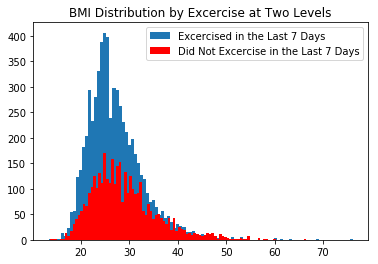

,Count,Max,Mean,Min,Std
Did not Excercise in the last week,3663,66.6,28.97,13.5,6.83
Excercised in the last week,6403,76.2,27.21,13.3,5.77


In [5]:
#Is there a significant effect on BMI for people who excercise vs people who dont?
#Excercise (EUEXCERCISE)
exer_yes= (results[(results.EUEXERCISE == 1)])
#print(exer_yes.describe())
exer_no = (results[(results.EUEXERCISE == 2)])
#print(exer_no.describe())

plt.hist(exer_yes.ERBMI, bins =100, label='Excercised in the Last 7 Days')
plt.hist(exer_no.ERBMI, bins=100, label="Did Not Excercise in the Last 7 Days", color = 'Red')
plt.title('BMI Distribution by Excercise at Two Levels')
plt.xlabel=('BMI')
plt.ylabel=('Frequency')
plt.legend(loc='upper right')
plt.show()


excer = {
    'Count':{"Excercised in the last week":6403,'Did not Excercise in the last week':3663},
    'Mean':{"Excercised in the last week":27.21,'Did not Excercise in the last week':28.97},
    'Std':{"Excercised in the last week":5.77,'Did not Excercise in the last week':6.83},
    'Min':{"Excercised in the last week":13.3,'Did not Excercise in the last week':13.5},
    'Max':{"Excercised in the last week":76.2,'Did not Excercise in the last week':66.6}}

excer_df = pd.DataFrame(excer)
excer_df.style
#excer yes    excer no
#count 6403    3663
#mean  27.21    28.97
#std   5.77     6.83
#min   13.3      13.5
#max   76.2     66.6

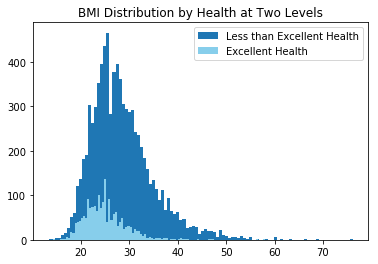

,Count,Max,Mean,Min,Std
Excellent Health,1797,58,24.97,14.3,4.37
Not Excellent Health,8274,76.2,28.48,13.3,6.4


In [6]:
#Is there a significant effect on BMI for people with excellent health condition vs others
#Health condition (EUGENHTH)
health_excel = (results[(results.EUGENHTH == 1)])
#print(health_excel.describe())
health_not_excel = (results[(results.EUGENHTH != 1)])
#print(health_not_excel.describe())


plt.hist(health_not_excel.ERBMI, bins =100, label='Less than Excellent Health')
plt.hist(health_excel.ERBMI, bins=100, label="Excellent Health", color = 'skyblue')
plt.title('BMI Distribution by Health at Two Levels')
plt.xlabel=('BMI')
plt.ylabel=('Frequency')
plt.legend(loc='upper right')
plt.show()

health = {
    'Count':{'Excellent Health':1797, 'Not Excellent Health':8274},
    'Mean':{'Excellent Health':24.97,'Not Excellent Health':28.48},
    'Std':{'Excellent Health':4.37,'Not Excellent Health':6.4},
    'Min':{'Excellent Health':14.3,'Not Excellent Health':13.3},
    'Max':{'Excellent Health':58.0,'Not Excellent Health':76.2}}

health_df = pd.DataFrame(health)
health_df.style

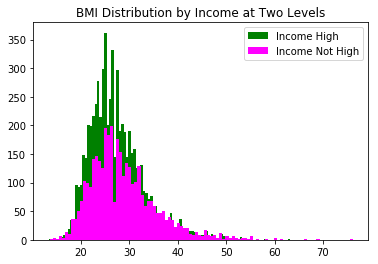

,Count,Max,Mean,Min,Std
High Income,6467,63.3,27.37,13.3,5.81
Not High Income,3604,76.2,28.7,13.5,6.87


In [7]:
#Is there a correlation between high BMI and Households whose income is high?
#Household Income (EEINCOME1)
income_high = (results[(results.EEINCOME1 == 1)])
#print(income_high.describe())
income_not_high = (results[(results.EEINCOME1 != 1)])
#print(income_not_high.describe())

plt.hist(income_high.ERBMI, bins=100, label="Income High", color = 'green')
plt.hist(income_not_high.ERBMI, bins=100, label= "Income Not High", color = 'magenta')
plt.title('BMI Distribution by Income at Two Levels')
plt.xlabel=('BMI')
plt.ylabel=("N occurances")
plt.legend(loc='upper right')
plt.show()

income ={
    'Count':{"High Income":6467,'Not High Income':3604},
    'Mean':{"High Income":27.37,'Not High Income':28.70},
    'Std':{"High Income":5.81,'Not High Income':6.87},
    'Max':{"High Income":63.30,'Not High Income':76.2},
    'Min':{"High Income":13.3,'Not High Income':13.5}}
income_df = pd.DataFrame(income)
income_df.style


count    10071.000000
mean        27.852913
std          6.239297
min         13.291053
25%         23.596283
50%         26.625120
75%         30.989293
max         76.225656
dtype: float64
count    10626.000000
mean        26.343657
std          8.837192
min         -1.000000
25%         23.000000
50%         26.400000
75%         30.700000
max         76.200000
Name: ERBMI, dtype: float64


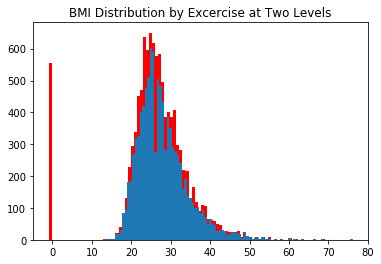

,Count,Max,Mean,Min,Std
Intial Survey Data,10626,76.2,26.34,-1,8.83
"Our ""Cleaned"" Data",10071,76.23,27.85,13.29,6.24


In [10]:
#height is in inches multiply by 0.0254 for meters
height_test = (results.EUHGT * 0.0254)

# weight is in pounds  multiply by 0.453592
weight_test = (results.EUWGT * 0.45359237000000013)

#bmi formula 'BMI is your weight (in kilograms) over your height squared meters
bmi_test = (weight_test / (height_test * height_test))
print(bmi_test.describe())
print(source_data['ERBMI'].describe())

plt.hist(source_data['ERBMI'], bins=100, label="Survey BMI", color = 'Red')
plt.hist(bmi_test, bins =100, label='Our BMI')
plt.title('BMI Distribution by Excercise at Two Levels')
plt.show()

BMIQ = {
    'Count':{'Our "Cleaned" Data':10071,'Intial Survey Data':10626},
    'Mean':{'Our "Cleaned" Data':27.85,'Intial Survey Data':26.34},
    'Std':{'Our "Cleaned" Data':6.24,'Intial Survey Data':8.83},
    'Max':{'Our "Cleaned" Data': 76.23, 'Intial Survey Data':76.20},
    'Min':{'Our "Cleaned" Data':13.29,'Intial Survey Data':-1 }}
BMIQ_df = pd.DataFrame(BMIQ)
BMIQ_df.style